In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("titanic_dataset.csv")

In [4]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


We need to do some data cleaning.

In [6]:
print("Missing value ratio of Cabin feature: " + str(sum(df["Cabin"].isna()) / len(df)))

Missing value ratio of Cabin feature: 0.774637127578304


More than three-fourths of Cabin feature values are missing. It is best to drop this feature.

In [7]:
df.drop("Cabin", axis=1, inplace=True)

In [8]:
print("Total number of missing values of Embarked feature: " + str(sum(df["Embarked"].isna())))

Total number of missing values of Embarked feature: 2


We can handle the missing values of Embarked feature by dropping the corresponding rows because there are just a few missing values.

In [9]:
df = df[df["Embarked"].notna()]

In [10]:
print("Total number of missing values of Fare feature: " + str(sum(df["Fare"].isna())))

Total number of missing values of Fare feature: 1


We can handle the missing value of Embarked feature the same way.

In [11]:
df = df[df["Fare"].notna()]

PassengerId, Name, and Ticket features are unique to each passenger and do not mean anything to ML algorithms. That means we can just drop those features.

In [12]:
df.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace=True)

In [13]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [14]:
1 - sum(df["Age"].notnull()) / len(df["Age"])

0.20137825421133226

Around one-fifth of Age feature values are missing. We should not drop rows of missing values or the feature here because it can greatly improve the performance of ML algorithms. The best way to deal with this issue should be filling the missing values with something that makes sense. We should check with which feature Age is the most correlated. To do that, we must convert categorical values to dummy variables in the dataset.

In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False
2,3,26.0,0,0,7.9250,1,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True


In [16]:
df.corr()["Age"]

Pclass       -0.409082
Age           1.000000
SibSp        -0.242345
Parch        -0.149311
Fare          0.177206
Survived     -0.055687
Sex_male      0.066006
Embarked_Q   -0.018490
Embarked_S   -0.073106
Name: Age, dtype: float64

Pclass is the most correlated feature with Age.

In [17]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

There are 3 different values of Pclass feature. We can obtain the average value of Age for each of these Pclass values.

In [18]:
classToAge = dict(df.groupby("Pclass")["Age"].mean())
for key in classToAge: classToAge[key] = round(classToAge[key])
classToAge

{1: 39, 2: 30, 3: 25}

The average age of passengers who belong to Pclass 1 is 38. For Pclass 2 and 3, the average age is 30 and 25, respectively. Lets fill the missing values.

In [19]:
df["Age"] = df[["Pclass", "Age"]].apply(lambda sample: classToAge[sample["Pclass"]] if pd.isna(sample["Age"]) else sample["Age"], axis = 1)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False
2,3,26.0,0,0,7.9250,1,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1306 non-null   int64  
 1   Age         1306 non-null   float64
 2   SibSp       1306 non-null   int64  
 3   Parch       1306 non-null   int64  
 4   Fare        1306 non-null   float64
 5   Survived    1306 non-null   int64  
 6   Sex_male    1306 non-null   bool   
 7   Embarked_Q  1306 non-null   bool   
 8   Embarked_S  1306 non-null   bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 75.2 KB


<Axes: xlabel='Survived', ylabel='count'>

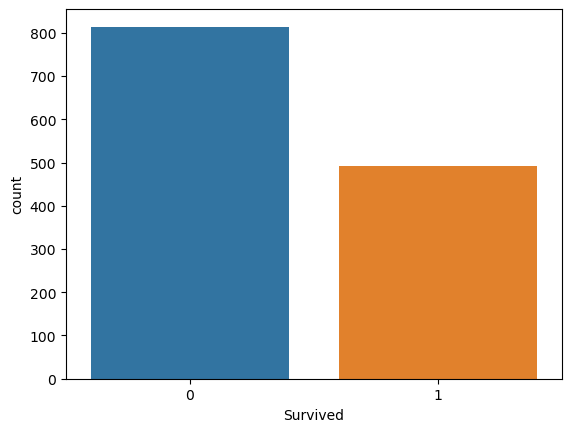

In [21]:
sns.countplot(data = df, x = "Survived")

It looks like we have a bit imbalanced data.

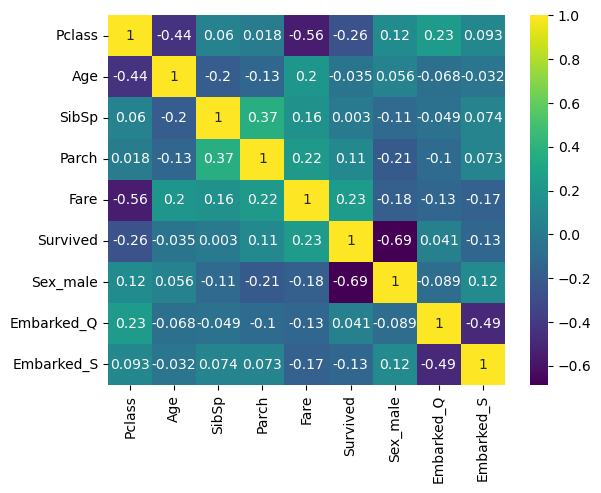

In [22]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

In [23]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

It is time to use some ML algorithms on our dataset. I will also use grid search method for hyperparameter tuning and pipeline for scaling the data during cross validation.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [27]:
pipe = Pipeline([('scaler', StandardScaler()), ("lr", LogisticRegression())])
lrParams = {"lr__penalty": ["l1", "l2"], "lr__C": [0.01, 0.1, 1, 10, 100], "lr__solver": ['liblinear']}
estimator = GridSearchCV(estimator = pipe, param_grid=lrParams, scoring="accuracy")
estimator.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.01, 0.1, 1, 10, 100],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear']},
             scoring='accuracy')

In [28]:
estimator.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=10, penalty='l1', solver='liblinear'))])

In [29]:
lrPredictions = estimator.predict(X_test)
lrPredictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [30]:
print(classification_report(y_test, lrPredictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       240
           1       0.85      0.78      0.81       152

    accuracy                           0.86       392
   macro avg       0.86      0.84      0.85       392
weighted avg       0.86      0.86      0.86       392



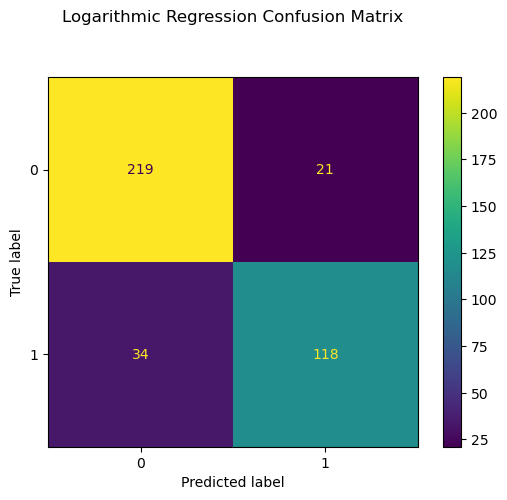

In [56]:
cm = confusion_matrix(y_test, lrPredictions, labels=estimator.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator.classes_)
#plt.title("Logarithmic Regression Confusion Matrix")
disp.plot()
plt.title("Logistic Regression Confusion Matrix", pad = 40)
plt.show()

In [32]:
pipe = Pipeline([('scaler', StandardScaler()), ("knn", KNeighborsClassifier())])
knnParams = {"knn__n_neighbors": range(1,31), "knn__weights": ["uniform", "distance"]}
estimator = GridSearchCV(estimator = pipe, param_grid=knnParams, scoring="accuracy")
estimator.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 31),
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [33]:
estimator.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=22))])

In [34]:
knnPredictions = estimator.predict(X_test)
knnPredictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [35]:
print(classification_report(y_test, knnPredictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       240
           1       0.85      0.76      0.80       152

    accuracy                           0.85       392
   macro avg       0.85      0.84      0.84       392
weighted avg       0.85      0.85      0.85       392



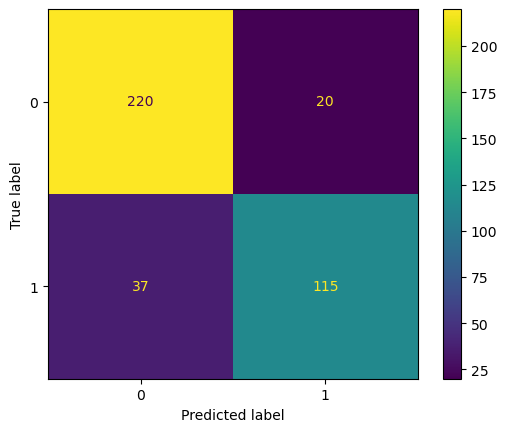

In [36]:
cm = confusion_matrix(y_test, knnPredictions, labels=estimator.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator.classes_)
disp.plot()
plt.title("K-Nearest Neighbors Confusion Matrix", pad = 40)
plt.show()

In [37]:
pipe = Pipeline([('scaler', StandardScaler()), ("decisionTree", DecisionTreeClassifier())])
decisionTreeParams = {"decisionTree__criterion": ["gini", "entropy"]}
estimator = GridSearchCV(estimator = pipe, param_grid=decisionTreeParams, scoring="accuracy")
estimator.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('decisionTree',
                                        DecisionTreeClassifier())]),
             param_grid={'decisionTree__criterion': ['gini', 'entropy']},
             scoring='accuracy')

In [38]:
estimator.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('decisionTree', DecisionTreeClassifier(criterion='entropy'))])

In [39]:
decisionTreePredictions = estimator.predict(X_test)

In [40]:
print(classification_report(y_test, decisionTreePredictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       240
           1       0.77      0.74      0.75       152

    accuracy                           0.81       392
   macro avg       0.80      0.80      0.80       392
weighted avg       0.81      0.81      0.81       392



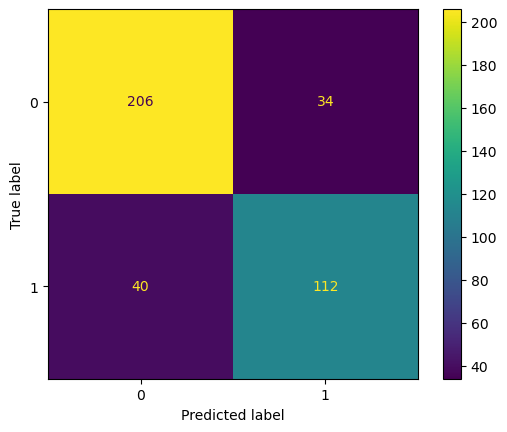

In [41]:
cm = confusion_matrix(y_test, decisionTreePredictions, labels=estimator.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator.classes_)
disp.plot()
plt.title("K-Nearest Neighbors Confusion Matrix", pad = 40)
plt.show()

In [42]:
pipe = Pipeline([('scaler', StandardScaler()), ("randomForest", RandomForestClassifier())])
randomForestParams = {"randomForest__bootstrap": [True, False], "randomForest__max_features": ["sqrt", "log2"], "randomForest__criterion": ["gini", "entropy"]}
estimator = GridSearchCV(estimator = pipe, param_grid=randomForestParams, scoring="accuracy")
estimator.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('randomForest',
                                        RandomForestClassifier())]),
             param_grid={'randomForest__bootstrap': [True, False],
                         'randomForest__criterion': ['gini', 'entropy'],
                         'randomForest__max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [43]:
estimator.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('randomForest', RandomForestClassifier(max_features='log2'))])

In [44]:
randomForestPredictions = estimator.predict(X_test)

In [45]:
print(classification_report(y_test, randomForestPredictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       240
           1       0.82      0.76      0.79       152

    accuracy                           0.84       392
   macro avg       0.84      0.83      0.83       392
weighted avg       0.84      0.84      0.84       392



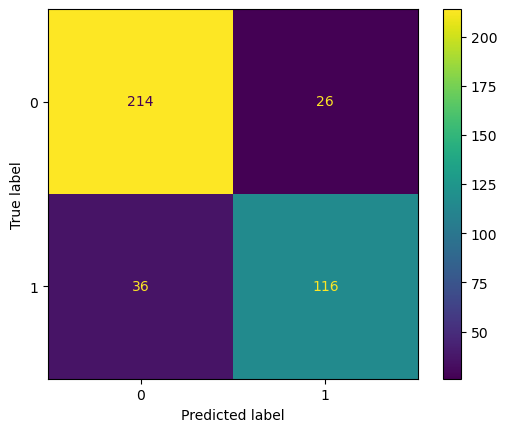

In [46]:
cm = confusion_matrix(y_test, randomForestPredictions, labels=estimator.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator.classes_)
disp.plot()
plt.title("K-Nearest Neighbors Confusion Matrix", pad = 40)
plt.show()

In [47]:
pipe = Pipeline([('scaler', StandardScaler()), ("svm", SVC())])
svmParams = {"svm__C": [0.01, 0.1, 1, 10, 100], "svm__kernel": ["rbf", "linear", "poly", "sigmoid"]}
estimator = GridSearchCV(estimator = pipe, param_grid=svmParams, scoring="accuracy")
estimator.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.01, 0.1, 1, 10, 100],
                         'svm__kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [48]:
estimator.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1, kernel='poly'))])

In [49]:
svmPredictions = estimator.predict(X_test)

In [50]:
print(classification_report(y_test, svmPredictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       240
           1       0.87      0.78      0.82       152

    accuracy                           0.87       392
   macro avg       0.87      0.85      0.86       392
weighted avg       0.87      0.87      0.87       392



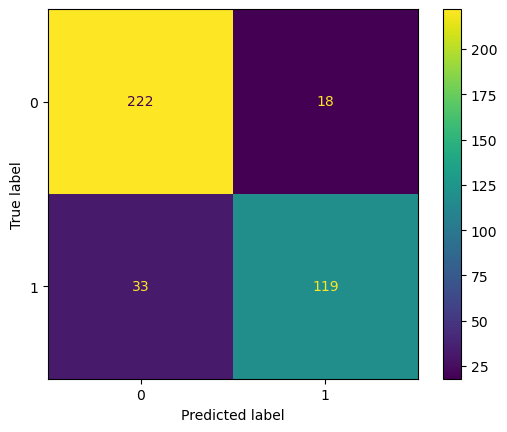

In [51]:
cm = confusion_matrix(y_test, svmPredictions, labels=estimator.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator.classes_)
disp.plot()
plt.title("Support Vector Machines Confusion Matrix", pad = 40)
plt.show()